In [37]:
import os
import requests
from bs4 import BeautifulSoup

# Main URL of the webpage
main_url = "https://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-8/faceimages/faces/"

# Directory to save downloaded files
base_directory = "/content/faces"

# Create the base directory if it doesn't exist
if not os.path.exists(base_directory):
    os.makedirs(base_directory)

# Function to download files from a subdirectory URL
def download_files(subdirectory_url, base_directory):
    # Send a GET request to the subdirectory URL
    response = requests.get(subdirectory_url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find all <tr> elements starting from the 4th <tr>
        rows = soup.find_all('tr')[3:]

        # Counter to keep track of downloaded files
        files_downloaded = 0
        files_skipped = 0
        total_file_size = 0

        # Iterate through each <tr> element
        for row in rows:
            try:
                # Find the 2nd <td> element within the <tr>
                td = row.find_all('td')[1]

                # Find the <a> tag within the <td>
                a = td.find('a')

                # Get the href attribute value (file URL)
                file_url = subdirectory_url + a.get('href')

                # Construct the file path to save the file
                filename = a.get('href').split("/")[-1]
                filepath = os.path.join(base_directory, filename)

                # Check if the file already exists in the directory
                if not os.path.exists(filepath):
                    # Send a GET request to download the file
                    file_response = requests.get(file_url)

                    # Save the file to the directory
                    with open(filepath, "wb") as file:
                        file.write(file_response.content)

                    files_downloaded += 1

                    # Calculate and increment the total size of downloaded files
                    file_size = os.path.getsize(filepath)
                    total_file_size += file_size
                else:
                    # print(f"Skipping: {filename} already exists")
                    files_skipped += 1
            except Exception as e:
                print(f"Downloading from directory {subdirectory_url} completed")
                files_skipped += 1

        # Print the total number of files downloaded for the current subdirectory
        print(f"Total files downloaded in {subdirectory_url}: {files_downloaded}")
        print(f"Total files skipped in {subdirectory_url}: {files_skipped}")
        print(f"Total storage space used in {subdirectory_url}: {total_file_size / (1024 * 1024):.2f} MB")

        # Return the count of downloaded files and total file size for this subdirectory
        return files_downloaded, total_file_size
    else:
        print(f"Failed to fetch webpage: {subdirectory_url}")
        return 0, 0

# Get user input for the number of image directories to download
num_directories = int(input("Enter the number of image directories you want to download from: "))

# Send a GET request to the main page
main_response = requests.get(main_url)

# Check if the request was successful
if main_response.status_code == 200:
    # Parse the HTML content of the main page
    main_soup = BeautifulSoup(main_response.content, 'html.parser')

    # Find all <tr> elements starting from the 4th <tr>
    main_rows = main_soup.find_all('tr')[3:]

    # Counter to keep track of total downloaded directories
    total_directories_downloaded = 0

    # Iterate through each <tr> element
    for main_row in main_rows:
        try:
            # Find the 2nd <td> element within the <tr>
            main_td = main_row.find_all('td')[1]

            # Find the <a> tag within the <td>
            main_a = main_td.find('a')

            # Get the href attribute value (subdirectory URL)
            subdirectory_url = main_url + main_a.get('href')

            # Download files from the subdirectory and get the count of downloaded files
            files_downloaded, total_file_size = download_files(subdirectory_url, base_directory)

            # Update the total count of downloaded directories
            total_directories_downloaded += 1

            # Check if the count of downloaded directories satisfies the user input
            if total_directories_downloaded >= num_directories:
                print(f"Number of image directories downloaded: {total_directories_downloaded}")
                break
        except Exception as e:
            print(f"Skipping row: {str(e)}")
else:
    print("Failed to fetch main webpage.")


Total files downloaded in https://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-8/faceimages/faces/an2i/: 0
Total files skipped in https://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-8/faceimages/faces/an2i/: 97
Total storage space used in https://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-8/faceimages/faces/an2i/: 0.00 MB
Total files downloaded in https://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-8/faceimages/faces/at33/: 0
Total files skipped in https://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-8/faceimages/faces/at33/: 97
Total storage space used in https://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-8/faceimages/faces/at33/: 0.00 MB
Total files downloaded in https://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-8/faceimages/faces/boland/: 0
Total files skipped in https://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-8/faceimages/faces/boland/: 97
Total storage space used in https://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-8/faceimages/faces/boland/: 0.00 MB
Total files downloaded in https

In [38]:
# prompt: show the number of files count at at33 folder

import os

# Directory containing the downloaded .pgm files
directory = "/content/faces/"

# Get the list of file names in the directory
file_names = os.listdir(directory)

# Print the number of files
print(f"Number of files in the directory: {len(file_names)}")


Number of files in the directory: 950


In [39]:
import os
import numpy as np
import cv2
import re

In [40]:
# Function to resize images to 32x30 and Normalize to [0,1]
def resize_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_img = cv2.resize(img, (32, 30))
    return resized_img / 255.0

# Function to parse labels from filenames
def parse_label(filename):
    label_match = re.search(r'_(.*?)_', filename)
    if label_match:
        primary_label = label_match.group(1) # Select the last matched label
        return primary_label
    return None

# Load dataset
data_path = "/content/faces"
image_files = os.listdir(data_path)
names = []
X = []
y = []
for file in image_files:
    if file.endswith(".pgm"):
        names.append(file)
        image_path = os.path.join(data_path, file)
        resized_image = resize_image(image_path)
        X.append(resized_image.flatten())
        label = parse_label(file)
        if label:
            y.append(label)
        else:
          print(file)
# Convert to numpy arrays
names = np.array(names)
X = np.array(X)
y = np.array(y)

In [41]:
print(names)
print(y)

['karyadi_left_sad_open_2.pgm' 'choon_left_happy_open_4.pgm'
 'boland_right_neutral_open_2.pgm' 'cheyer_left_sad_open_2.pgm'
 'ch4f_right_neutral_sunglasses.pgm' 'danieln_right_sad_sunglasses_2.pgm'
 'danieln_up_sad_open_4.pgm' 'choon_right_neutral_open.pgm'
 'karyadi_right_sad_sunglasses_2.pgm' 'an2i_up_sad_sunglasses.pgm'
 'bpm_right_angry_sunglasses.pgm' 'at33_left_happy_sunglasses_4.pgm'
 'an2i_straight_happy_open.pgm' 'karyadi_straight_angry_open_2.pgm'
 'glickman_up_happy_sunglasses_4.pgm'
 'boland_straight_happy_sunglasses_2.pgm' 'at33_up_happy_sunglasses_2.pgm'
 'danieln_left_neutral_open_4.pgm' 'boland_up_neutral_sunglasses_2.pgm'
 'at33_straight_neutral_open_2.pgm' 'karyadi_right_angry_open_2.pgm'
 'danieln_straight_sad_sunglasses_2.pgm'
 'cheyer_straight_happy_sunglasses_4.pgm'
 'danieln_up_happy_sunglasses_2.pgm' 'boland_up_happy_sunglasses.pgm'
 'an2i_left_angry_sunglasses_2.pgm' 'boland_straight_sad_open.pgm'
 'boland_right_neutral_sunglasses_4.pgm'
 'danieln_up_angry_sun

In [42]:
# Assuming you have X and y arrays defined somewhere
# Check the sizes of X and y
print("Size of X[0]:", len(X[0]))
print("Size of X:", len(X))
print("Size of y[0]:", len(y[0]))
print("Size of y:", len(y))

# Split data into training and testing sets (80% train, 20% test)
num_samples = len(X)
num_train_samples = int(0.8 * num_samples)
train_indices = np.random.choice(num_samples, num_train_samples, replace=False)
test_indices = np.array(list(set(range(num_samples)) - set(train_indices)))

# Check the size of train_indices and test_indices
print("Size of train_indices:", len(train_indices))
print("Size of test_indices:", len(test_indices))

# Check for any out-of-bounds indices in y
if np.any(train_indices >= len(y)) or np.any(test_indices >= len(y)):
    print("Indices out of bounds for y.")
else:
    # Proceed with splitting X and y
    names_train, names_test = names[train_indices], names[test_indices]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]


Size of X[0]: 960
Size of X: 945
Size of y[0]: 4
Size of y: 945
Size of train_indices: 756
Size of test_indices: 189


In [43]:
# Debugging code to print the first 5 samples of X_train, X_test, y_train, and y_test
print("Size of X_train:", len(X_train))
print("Size of X_test:", len(X_test))
print("Size of X:", len(y_train))
print("Size of y:", len(y_test))
print("X_train:")
print(X_train[:5])
print("X_test:")
print(X_test[:5])
print("y_train:")
print(y_train[:5])
print("y_test:")
print(y_test[:5])
print("names_train:")
print(names_train[:5])
print("names_test:")
print(names_test[:5])

Size of X_train: 756
Size of X_test: 189
Size of X: 756
Size of y: 189
X_train:
[[0.03529412 0.1372549  0.08235294 ... 0.24705882 0.09411765 0.01176471]
 [0.14117647 0.13333333 0.1254902  ... 0.18039216 0.16470588 0.08235294]
 [0.15686275 0.16470588 0.16862745 ... 0.09411765 0.05882353 0.02745098]
 [0.10588235 0.10196078 0.09803922 ... 0.03137255 0.10588235 0.11372549]
 [0.14509804 0.1372549  0.13333333 ... 0.19607843 0.18431373 0.16862745]]
X_test:
[[0.16078431 0.15294118 0.14509804 ... 0.07058824 0.16862745 0.16862745]
 [0.10196078 0.13333333 0.10980392 ... 0.         0.         0.        ]
 [0.0745098  0.05490196 0.06666667 ... 0.39215686 0.14901961 0.        ]
 [0.05882353 0.14509804 0.1372549  ... 0.47843137 0.22352941 0.        ]
 [0.14509804 0.14901961 0.15686275 ... 0.08627451 0.01176471 0.        ]]
y_train:
['right' 'up' 'straight' 'straight' 'up']
y_test:
['left' 'left' 'straight' 'straight' 'up']
names_train:
['an2i_right_happy_sunglasses_2.pgm' 'choon_up_happy_sunglasses_2

In [44]:
# Convert labels to one-hot encoding
label_map = {'straight': [1, 0, 0, 0], 'up': [0, 1, 0, 0], 'left': [0, 0, 1, 0], 'right': [0, 0, 0, 1]}

y_train_encoded = np.array([label_map[label] for label in y_train])
y_test_encoded = np.array([label_map[label] for label in y_test])

print("y_train:")
print(len(y_train_encoded))
print(y_train_encoded[:5])

print("y_test:")
print(len(y_test_encoded))
print(y_test_encoded[:5])

y_train:
756
[[0 0 0 1]
 [0 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 1 0 0]]
y_test:
189
[[0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 1 0 0]]


In [45]:
# Reverse the label_map dictionary to map encoded labels back to their corresponding strings
# reverse_label_map = {tuple(v): k for k, v in label_map.items()}
reverse_label_map = {(1, 0, 0, 0): 'straight', (0, 1, 0, 0): 'up', (0, 0, 1, 0): 'left', (0, 0, 0, 1): 'right'}
print(reverse_label_map)

{(1, 0, 0, 0): 'straight', (0, 1, 0, 0): 'up', (0, 0, 1, 0): 'left', (0, 0, 0, 1): 'right'}


In [46]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def forward(self, inputs):
        # Forward pass
        # Input to hidden layer
        self.hidden_sum = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_activation = self.sigmoid(self.hidden_sum)

        # Hidden to output layer
        self.output_sum = np.dot(self.hidden_activation, self.weights_hidden_output) + self.bias_output
        self.output = self.softmax(self.output_sum)

        return self.output

    def backward(self, inputs, targets, learning_rate):
        # Backward pass
        # Calculate error
        output_error = targets - self.output

        # Calculate gradients
        output_delta = output_error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_activation)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_activation.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(inputs.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def train(self, X_train, y_train_encoded, epochs=1000, learning_rate=0.003):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X_train)

            # Backward pass
            self.backward(X_train, y_train_encoded, learning_rate)

            # Print error every 100 epochs
            if epoch % 100 == 0:
                error = np.mean(np.square(y_train_encoded - output))
                print(f'Error at epoch {epoch}: {error}')

    def evaluate_accuracy(self, X_test, y_test_encoded):
        # Predict on X_test
        predictions = self.forward(X_test)

        # Round the predictions for binary classification or use argmax for multiclass
        rounded_predictions = np.round(predictions)  # For binary classification

        # Calculate accuracy
        if rounded_predictions.shape == y_test_encoded.shape:
            accuracy = np.mean(np.all(rounded_predictions == y_test_encoded, axis=1))
            print("Accuracy:", accuracy)
        else:
            print("Shapes of predictions and y_test_encoded do not match.")

# Example usage:
input_size = 960
hidden_size = 100
output_size = 4

# Create a neural network
nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.train(X_train, y_train_encoded)
nn.evaluate_accuracy(X_test, y_test_encoded)

Error at epoch 0: 0.3428772209246459
Error at epoch 100: 0.009179261707167949
Error at epoch 200: 0.0014259397458830556
Error at epoch 300: 0.0004288846183199376
Error at epoch 400: 0.00018458689591816164
Error at epoch 500: 9.716837551060373e-05
Error at epoch 600: 5.8101621372711936e-05
Error at epoch 700: 3.7871297649447445e-05
Error at epoch 800: 2.6275763937380895e-05
Error at epoch 900: 1.9115465471258216e-05
Accuracy: 1.0


In [48]:
import matplotlib.pyplot as plt
from PIL import Image

def display_images_with_predictions(names_train, predictions, reverse_label_map, path="/content/faces/", max_images=200):
    try:
        count = 0
        # Loop through each file name and its corresponding predicted result
        for file_name, prediction in zip(names_train, predictions):
            # Reverse encode the prediction using the reverse_label_map
            predicted_label = reverse_label_map[tuple(np.round(prediction))]
            count += 1
            if count > max_images:
                break
            # Open and display the image
            img = Image.open(path + file_name)
            plt.imshow(img)
            plt.title(f"Predicted Label: {predicted_label}")
            plt.axis('off')
            plt.show()
            # Print the file name and its predicted label
            print("File Name:", file_name)
            print("Predicted Label:", predicted_label)
    except Exception as e:
        print("Error:", e)
        print("Completed")


Accuracy: 1.0


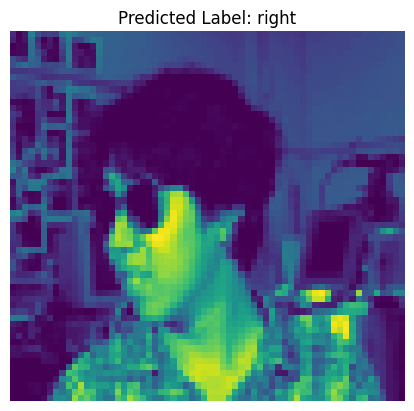

File Name: an2i_right_happy_sunglasses_2.pgm
Predicted Label: right


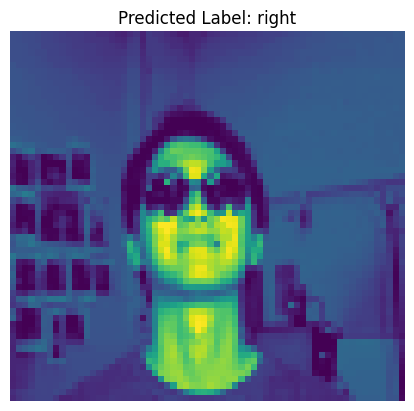

File Name: choon_up_happy_sunglasses_2.pgm
Predicted Label: right


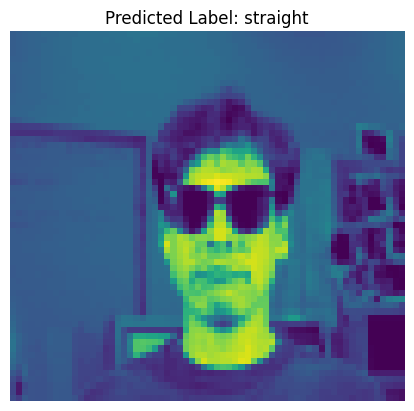

File Name: glickman_straight_sad_sunglasses_2.pgm
Predicted Label: straight


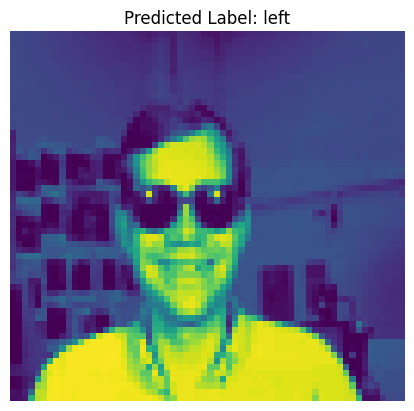

File Name: at33_straight_happy_sunglasses_2.pgm
Predicted Label: left


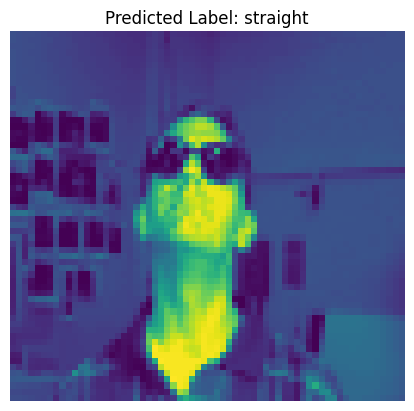

File Name: boland_up_angry_sunglasses_2.pgm
Predicted Label: straight


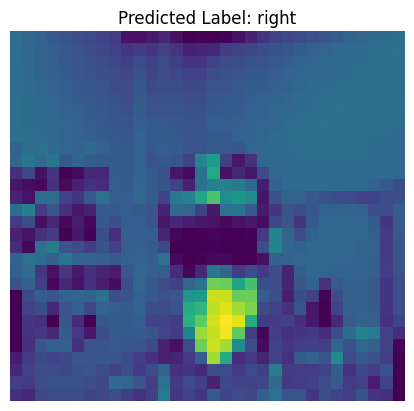

File Name: danieln_up_sad_sunglasses_4.pgm
Predicted Label: right


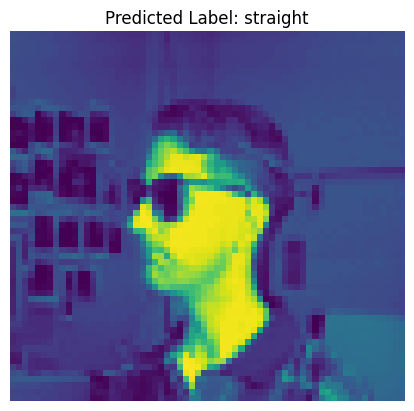

File Name: boland_right_angry_sunglasses_2.pgm
Predicted Label: straight


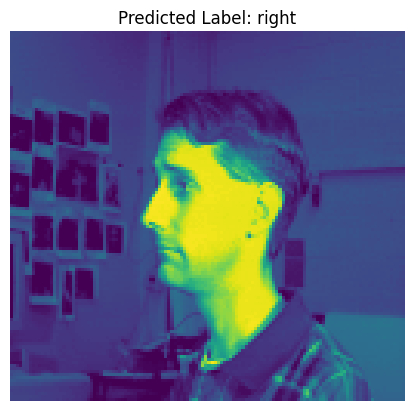

File Name: boland_right_sad_open.pgm
Predicted Label: right


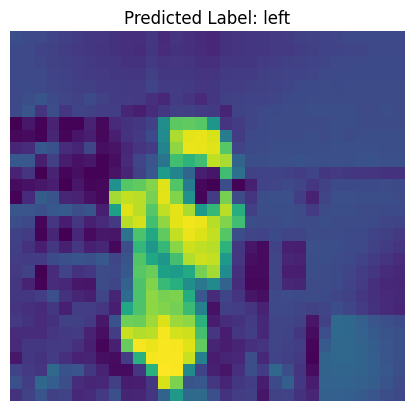

File Name: boland_left_neutral_sunglasses_4.pgm
Predicted Label: left


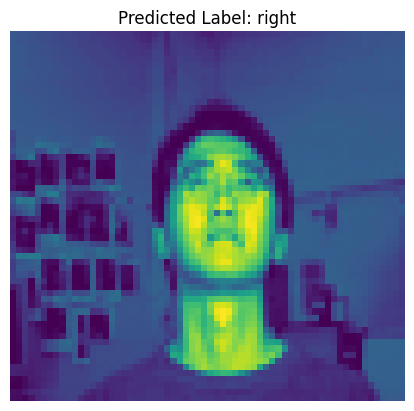

File Name: choon_up_neutral_open_2.pgm
Predicted Label: right


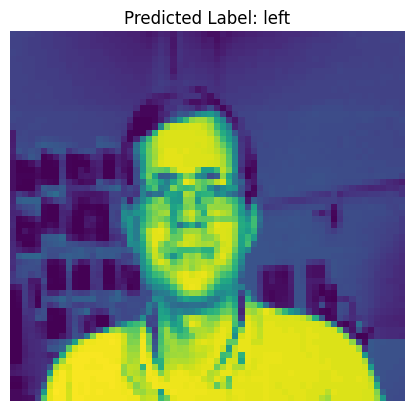

File Name: at33_straight_neutral_open_2.pgm
Predicted Label: left


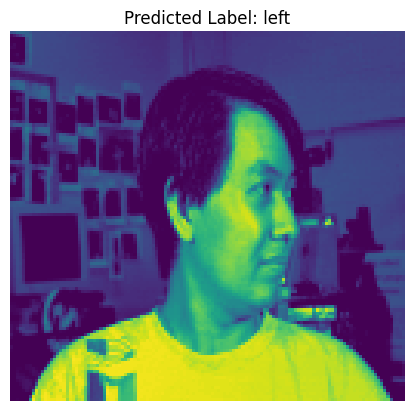

File Name: karyadi_left_neutral_open.pgm
Predicted Label: left


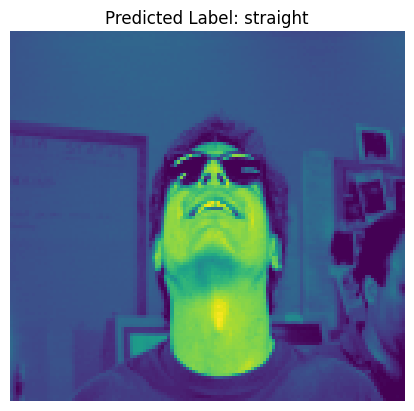

File Name: glickman_up_happy_sunglasses.pgm
Predicted Label: straight


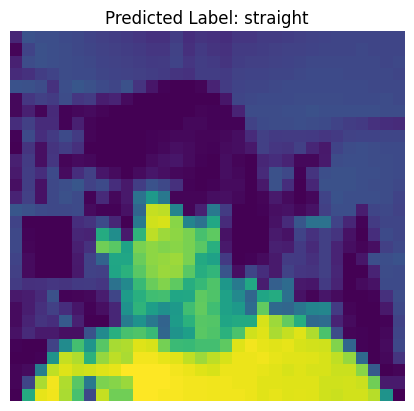

File Name: karyadi_right_neutral_sunglasses_4.pgm
Predicted Label: straight


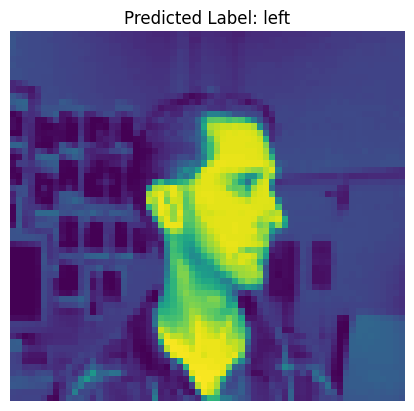

File Name: boland_left_sad_open_2.pgm
Predicted Label: left


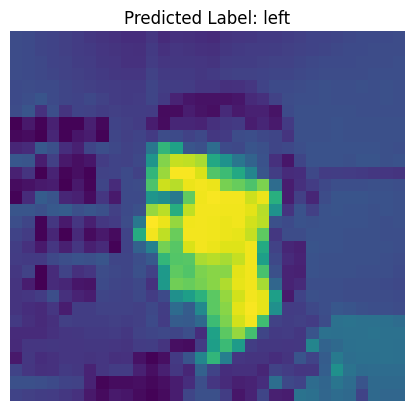

File Name: boland_right_angry_open_4.pgm
Predicted Label: left


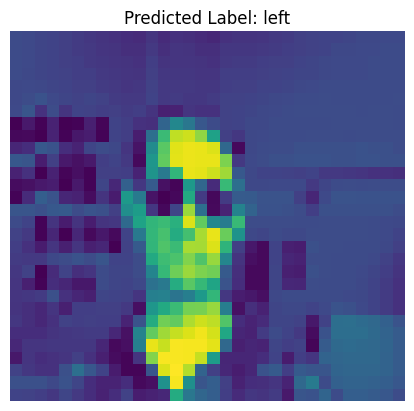

File Name: boland_straight_sad_sunglasses_4.pgm
Predicted Label: left


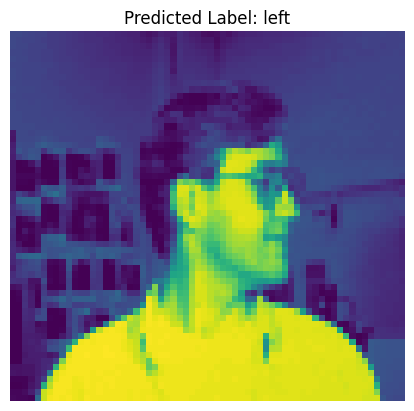

File Name: bpm_left_happy_open_2.pgm
Predicted Label: left


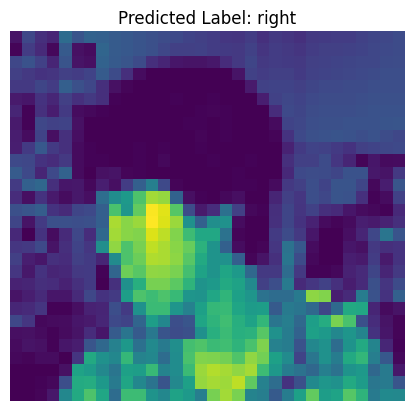

File Name: an2i_right_sad_open_4.pgm
Predicted Label: right


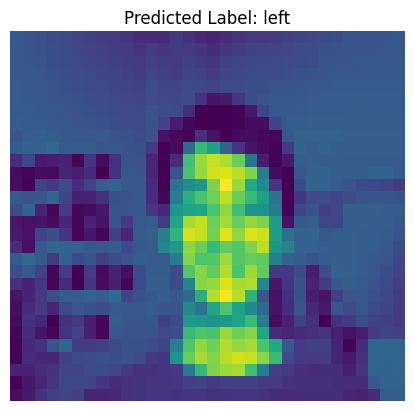

File Name: choon_straight_happy_open_4.pgm
Predicted Label: left


In [52]:
nn.evaluate_accuracy(X_test, y_test_encoded)

# Define the path to the directory where the images are located
path_to_images = "/content/faces/"

# Call the function to display images with predictions
display_images_with_predictions(names_train, predictions, reverse_label_map, path=path_to_images, max_images=20)


In [15]:
import os
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-8/faceimages/faces/steffi/"

# Directory to save downloaded files
directory = "/content/predict"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all <tr> elements starting from the 4th <tr>
    rows = soup.find_all('tr')[3:]

    # Iterate through each <tr> element
    for row in rows:
        try:
            # Find the 2nd <td> element within the <tr>
            td = row.find_all('td')[1]

            # Find the <a> tag within the <td>
            a = td.find('a')

            # Get the href attribute value
            href = a.get('href')

            # Download the .pgm file
            file_url = f"{url}/{href}"
            filename = href.split("/")[-1]
            filepath = os.path.join(directory, filename)

            # Send a GET request to download the file
            file_response = requests.get(file_url)

            # Save the file to the directory
            with open(filepath, "wb") as file:
                file.write(file_response.content)

            print(f"Downloaded: {filename}")
        except IndexError:
            print(f"Completed downloading from {url}")
else:
    print("Failed to fetch webpage.")


Downloaded: steffi_left_angry_open.pgm
Downloaded: steffi_left_angry_open_2.pgm
Downloaded: steffi_left_angry_open_4.pgm
Downloaded: steffi_left_angry_sunglasses.pgm
Downloaded: steffi_left_angry_sunglasses_2.pgm
Downloaded: steffi_left_angry_sunglasses_4.pgm
Downloaded: steffi_left_happy_open.pgm
Downloaded: steffi_left_happy_open_2.pgm
Downloaded: steffi_left_happy_open_4.pgm
Downloaded: steffi_left_happy_sunglasses.pgm
Downloaded: steffi_left_happy_sunglasses_2.pgm
Downloaded: steffi_left_happy_sunglasses_4.pgm
Downloaded: steffi_left_neutral_open.pgm
Downloaded: steffi_left_neutral_open_2.pgm
Downloaded: steffi_left_neutral_open_4.pgm
Downloaded: steffi_left_neutral_sunglasses.pgm
Downloaded: steffi_left_neutral_sunglasses_2.pgm
Downloaded: steffi_left_neutral_sunglasses_4.pgm
Downloaded: steffi_left_sad_open.pgm
Downloaded: steffi_left_sad_open_2.pgm
Downloaded: steffi_left_sad_open_4.pgm
Downloaded: steffi_left_sad_sunglasses.pgm
Downloaded: steffi_left_sad_sunglasses_2.pgm
Downl

In [53]:
# Load dataset
data_path = "/content/predict/"
image_files = os.listdir(data_path)
predict_image = []
label_image = []
name_list = []
for file in image_files:
    if file.endswith(".pgm"):
        image_path = os.path.join(data_path, file)
        name_list.append(file)
        resized_image = resize_image(image_path)
        predict_image.append(resized_image.flatten())
        label = parse_label(file)
        if label:
            label_image.append(label)
        else:
          print(file)
# Convert to numpy arrays
name_list = np.array(name_list)
predict_image = np.array(predict_image)
label_image = np.array(label_image)
# Convert labels to one-hot encoding
label_map = {'straight': [1, 0, 0, 0], 'up': [0, 1, 0, 0], 'left': [0, 0, 1, 0], 'right': [0, 0, 0, 1]}

label_map_encoded = np.array([label_map[label] for label in label_image])

Accuracy: 0.5833333333333334


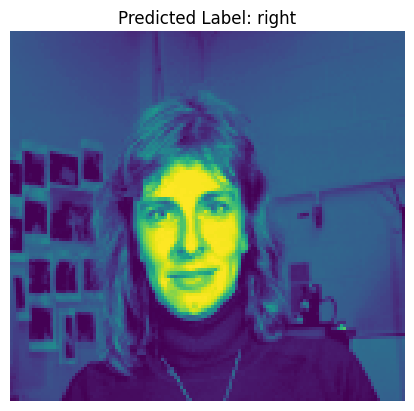

File Name: steffi_straight_sad_open.pgm
Predicted Label: right


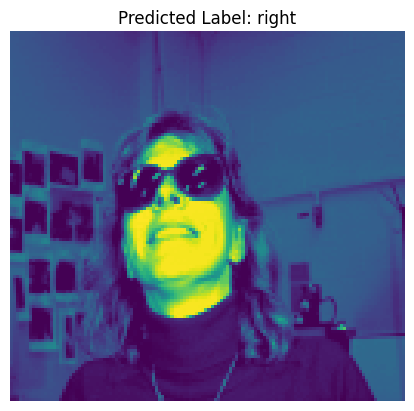

File Name: steffi_up_happy_sunglasses.pgm
Predicted Label: right


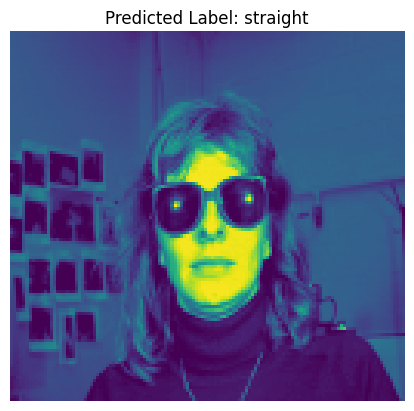

File Name: steffi_straight_neutral_sunglasses.pgm
Predicted Label: straight


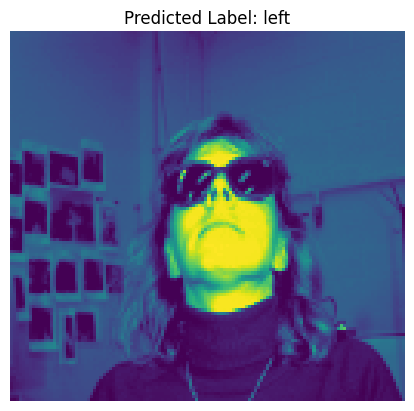

File Name: steffi_up_angry_sunglasses.pgm
Predicted Label: left


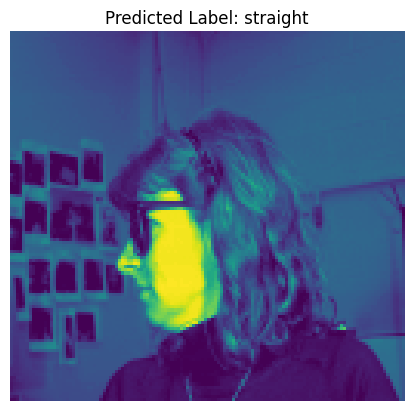

File Name: steffi_right_angry_sunglasses.pgm
Predicted Label: straight


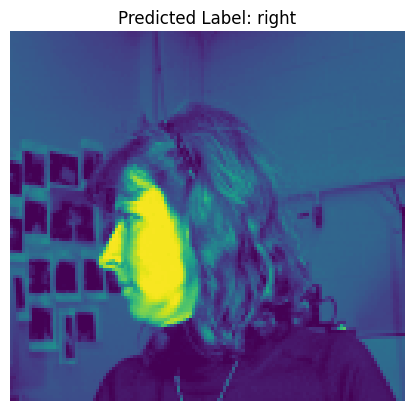

File Name: steffi_right_angry_open.pgm
Predicted Label: right


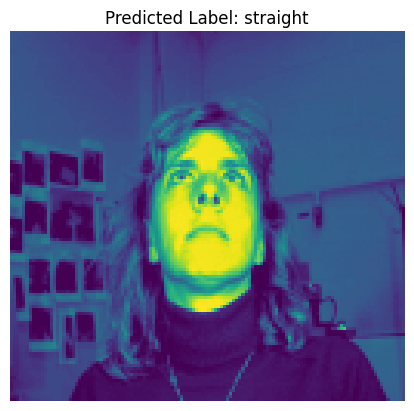

File Name: steffi_up_sad_open.pgm
Predicted Label: straight


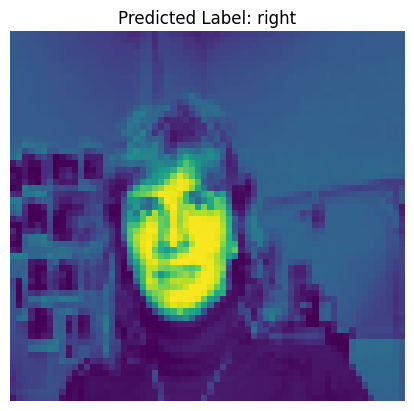

File Name: steffi_straight_neutral_open_2.pgm
Predicted Label: right


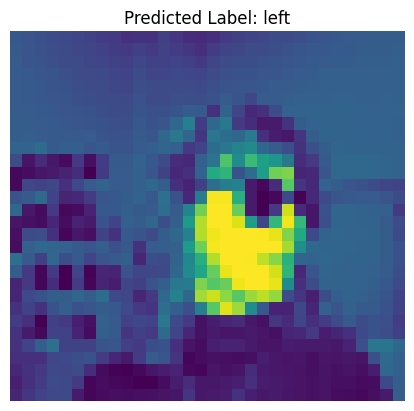

File Name: steffi_left_neutral_sunglasses_4.pgm
Predicted Label: left


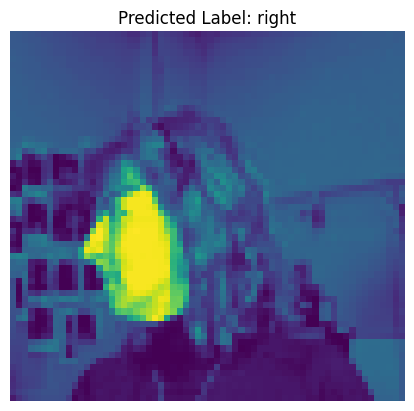

File Name: steffi_right_neutral_open_2.pgm
Predicted Label: right


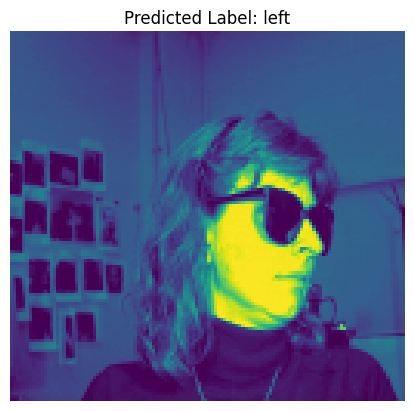

File Name: steffi_left_angry_sunglasses.pgm
Predicted Label: left


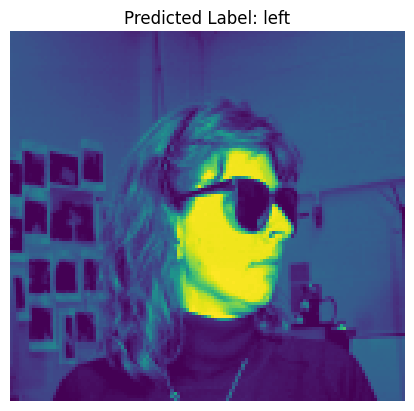

File Name: steffi_left_sad_sunglasses.pgm
Predicted Label: left


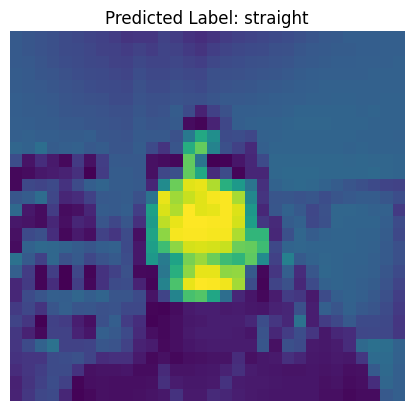

File Name: steffi_up_neutral_sunglasses_4.pgm
Predicted Label: straight


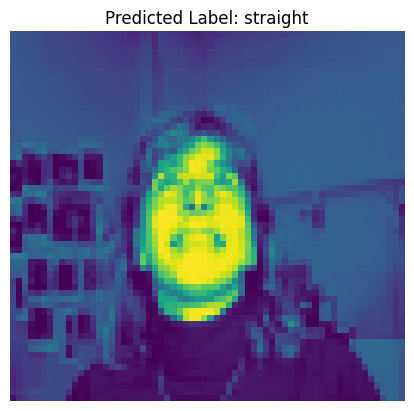

File Name: steffi_up_happy_open_2.pgm
Predicted Label: straight


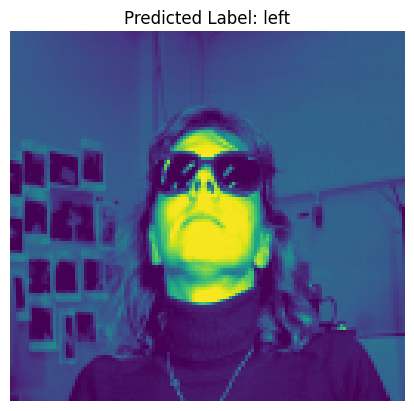

File Name: steffi_up_sad_sunglasses.pgm
Predicted Label: left


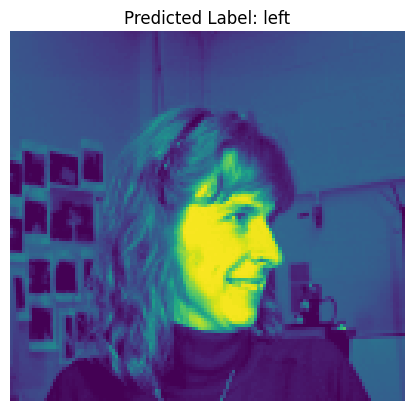

File Name: steffi_left_happy_open.pgm
Predicted Label: left


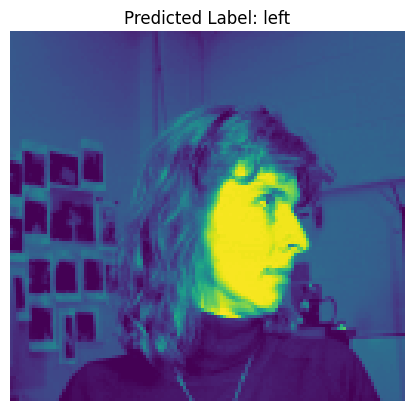

File Name: steffi_left_sad_open.pgm
Predicted Label: left


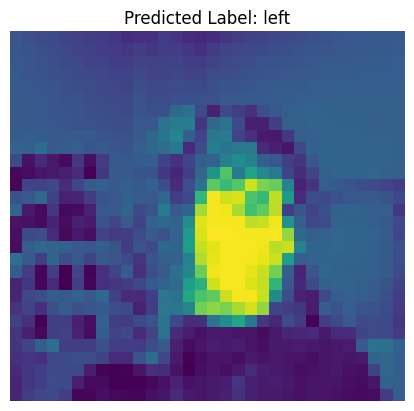

File Name: steffi_left_angry_open_4.pgm
Predicted Label: left


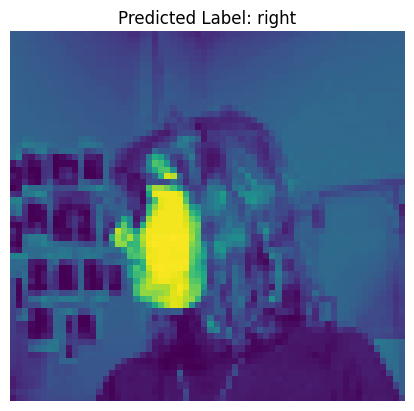

File Name: steffi_right_neutral_sunglasses_2.pgm
Predicted Label: right


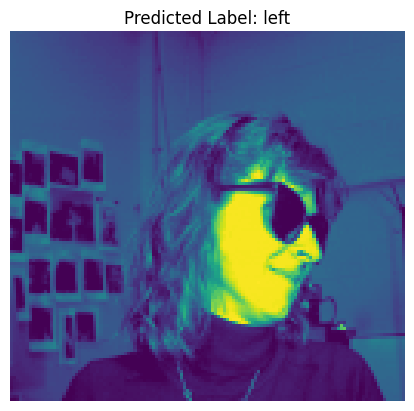

File Name: steffi_left_happy_sunglasses.pgm
Predicted Label: left


In [54]:
# Test on predict_image label_map_encoded
# Predict on X_test


predictions = nn.forward(predict_image)
# print(predictions.shape)
# print(label_map_encoded.shape)
# Round the predictions for binary classification or use argmax for multiclass
rounded_predictions = np.round(predictions)  # For binary classification

# Calculate accuracy
if rounded_predictions.shape == label_map_encoded.shape:
    accuracy = np.mean(np.all(rounded_predictions == label_map_encoded, axis=1))
    print("Accuracy:", accuracy)
else:
    print("Shapes of predictions and y_test_encoded do not match.")

# Call the function to display images with predictions
display_images_with_predictions(name_list, predictions, reverse_label_map, path=data_path, max_images=20)

In [57]:
import os
import pickle

def save_model(model, directory, filename):
    # Ensure the directory exists
    if not os.path.exists(directory):
        os.makedirs(directory)
    filepath = os.path.join(directory, filename)
    with open(filepath, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved to {filepath}")


In [58]:
from google.colab import drive
drive.mount('/googledrive')

Mounted at /googledrive


In [61]:
# Assume `nn` is your trained NeuralNetwork instance
save_model(nn, '/googledrive/MyDrive/GSSOC24/ThereForYou', 'neural_network_model.pkl')


Model saved to /googledrive/MyDrive/GSSOC24/ThereForYou/neural_network_model.pkl


Model loaded from /googledrive/MyDrive/GSSOC24/ThereForYou/neural_network_model.pkl


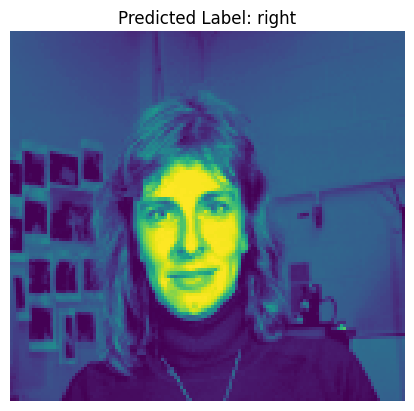

File Name: steffi_straight_sad_open.pgm
Predicted Label: right


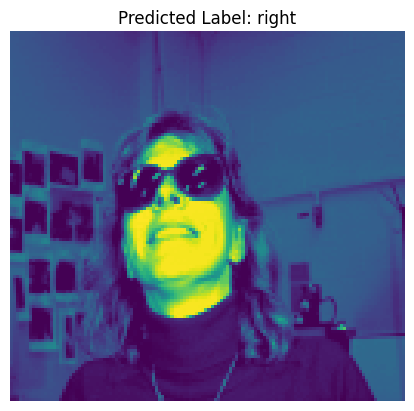

File Name: steffi_up_happy_sunglasses.pgm
Predicted Label: right


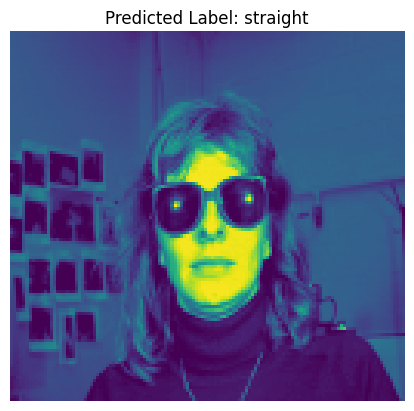

File Name: steffi_straight_neutral_sunglasses.pgm
Predicted Label: straight


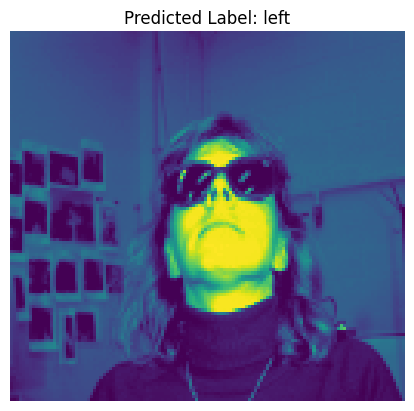

File Name: steffi_up_angry_sunglasses.pgm
Predicted Label: left


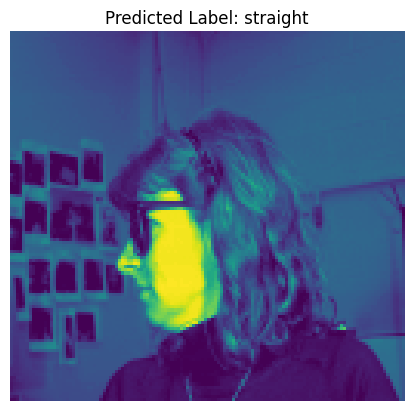

File Name: steffi_right_angry_sunglasses.pgm
Predicted Label: straight


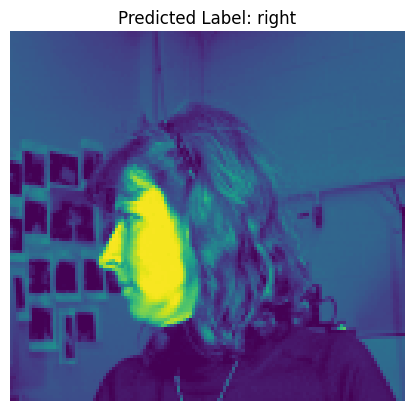

File Name: steffi_right_angry_open.pgm
Predicted Label: right


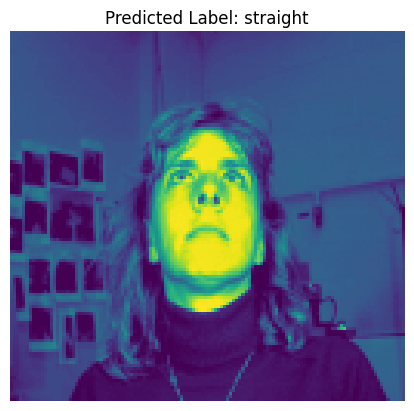

File Name: steffi_up_sad_open.pgm
Predicted Label: straight


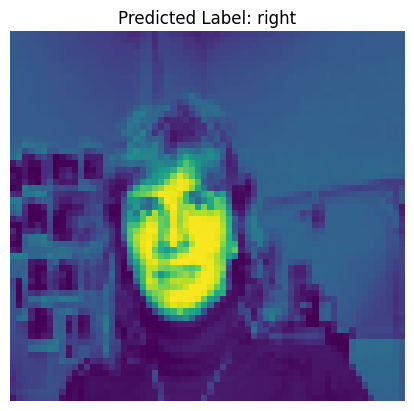

File Name: steffi_straight_neutral_open_2.pgm
Predicted Label: right


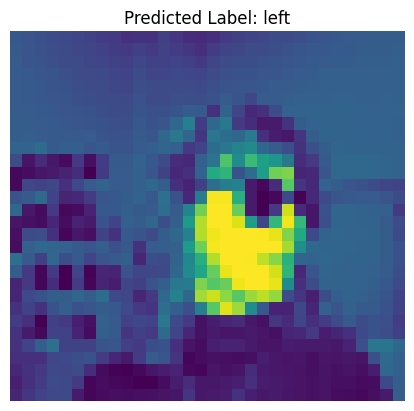

File Name: steffi_left_neutral_sunglasses_4.pgm
Predicted Label: left


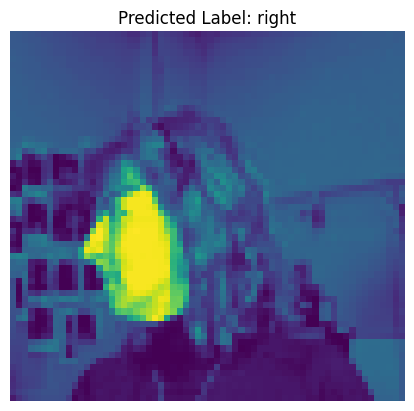

File Name: steffi_right_neutral_open_2.pgm
Predicted Label: right


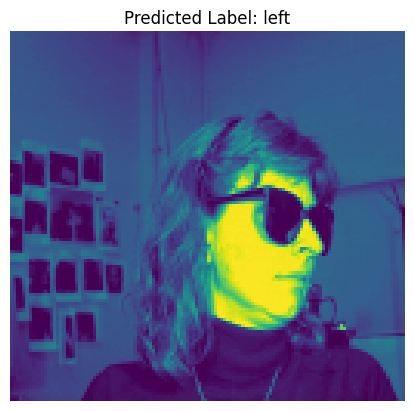

File Name: steffi_left_angry_sunglasses.pgm
Predicted Label: left


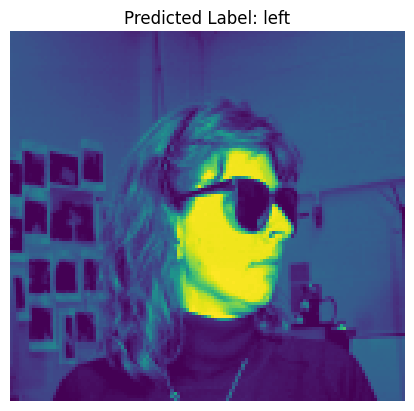

File Name: steffi_left_sad_sunglasses.pgm
Predicted Label: left


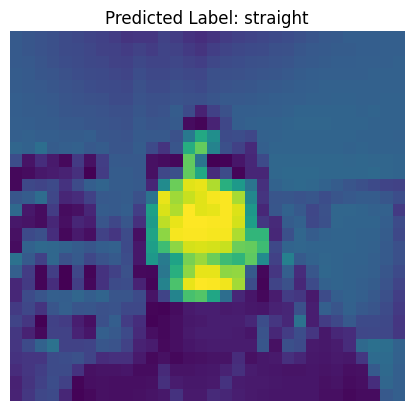

File Name: steffi_up_neutral_sunglasses_4.pgm
Predicted Label: straight


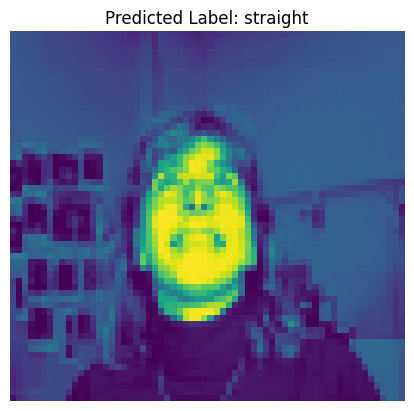

File Name: steffi_up_happy_open_2.pgm
Predicted Label: straight


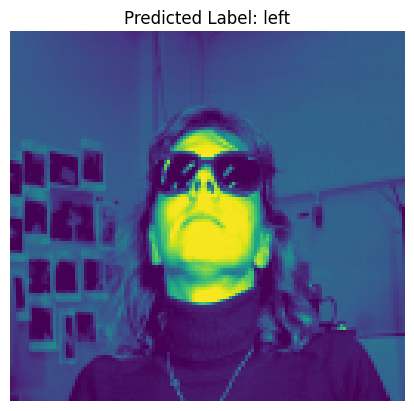

File Name: steffi_up_sad_sunglasses.pgm
Predicted Label: left


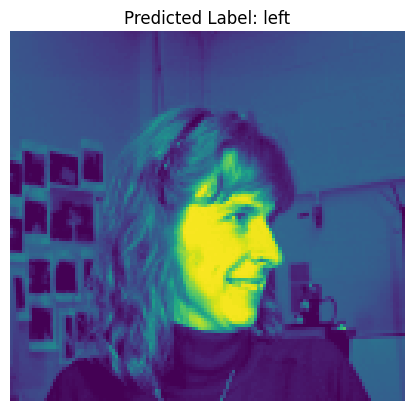

File Name: steffi_left_happy_open.pgm
Predicted Label: left


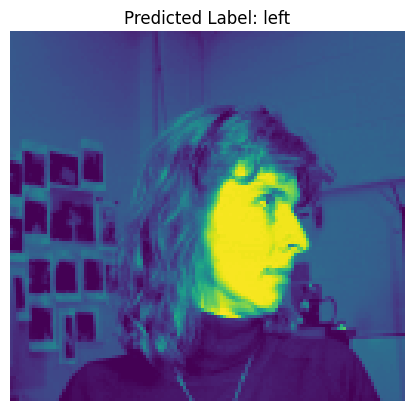

File Name: steffi_left_sad_open.pgm
Predicted Label: left


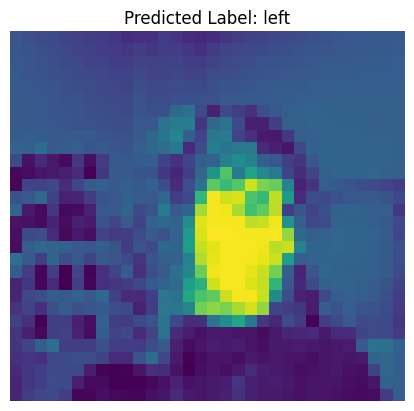

File Name: steffi_left_angry_open_4.pgm
Predicted Label: left


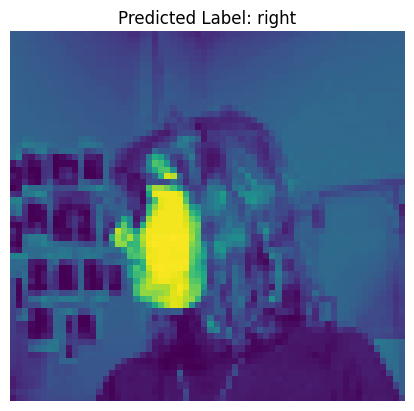

File Name: steffi_right_neutral_sunglasses_2.pgm
Predicted Label: right


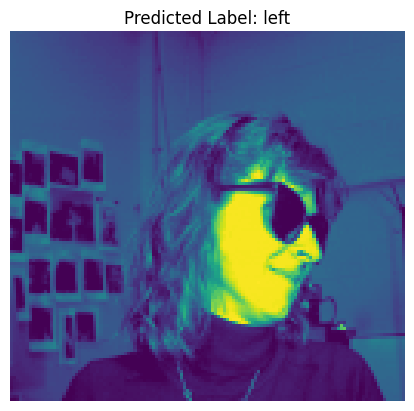

File Name: steffi_left_happy_sunglasses.pgm
Predicted Label: left


In [62]:
import os
import requests
from bs4 import BeautifulSoup
import numpy as np
import cv2
import re
import pickle
import matplotlib.pyplot as plt
from PIL import Image

# Neural Network class definition (same as before)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def forward(self, inputs):
        # Forward pass
        self.hidden_sum = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_activation = self.sigmoid(self.hidden_sum)

        self.output_sum = np.dot(self.hidden_activation, self.weights_hidden_output) + self.bias_output
        self.output = self.softmax(self.output_sum)

        return self.output

    def backward(self, inputs, targets, learning_rate):
        # Backward pass
        output_error = targets - self.output

        # Calculate gradients
        output_delta = output_error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_activation)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_activation.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(inputs.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def train(self, X_train, y_train_encoded, epochs=1000, learning_rate=0.003):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X_train)

            # Backward pass
            self.backward(X_train, y_train_encoded, learning_rate)

            # Print error every 100 epochs
            if epoch % 100 == 0:
                error = np.mean(np.square(y_train_encoded - output))
                print(f'Error at epoch {epoch}: {error}')

    def evaluate_accuracy(self, X_test, y_test_encoded):
        # Predict on X_test
        predictions = self.forward(X_test)

        # Round the predictions for binary classification or use argmax for multiclass
        rounded_predictions = np.round(predictions)  # For binary classification

        # Calculate accuracy
        if rounded_predictions.shape == y_test_encoded.shape:
            accuracy = np.mean(np.all(rounded_predictions == y_test_encoded, axis=1))
            print("Accuracy:", accuracy)
        else:
            print("Shapes of predictions and y_test_encoded do not match.")

# Function to save the model
def save_model(model, directory, filename):
    if not os.path.exists(directory):
        os.makedirs(directory)
    filepath = os.path.join(directory, filename)
    with open(filepath, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved to {filepath}")

# Function to load the model
def load_model(directory, filename):
    filepath = os.path.join(directory, filename)
    with open(filepath, 'rb') as file:
        model = pickle.load(file)
    print(f"Model loaded from {filepath}")
    return model

# Function to resize images to 32x30 and normalize to [0,1]
def resize_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_img = cv2.resize(img, (32, 30))
    return resized_img / 255.0

# Function to parse labels from filenames
def parse_label(filename):
    label_match = re.search(r'_(.*?)_', filename)
    if label_match:
        primary_label = label_match.group(1)
        return primary_label
    return None

# Function to display images with predictions
def display_images_with_predictions(names, predictions, reverse_label_map, path, max_images=20):
    try:
        count = 0
        for file_name, prediction in zip(names, predictions):
            predicted_label = reverse_label_map[tuple(np.round(prediction))]
            count += 1
            if count > max_images:
                break
            img = Image.open(path + file_name)
            plt.imshow(img)
            plt.title(f"Predicted Label: {predicted_label}")
            plt.axis('off')
            plt.show()
            print("File Name:", file_name)
            print("Predicted Label:", predicted_label)
    except Exception as e:
        print("Error:", e)
        print("Completed")

# Load the trained model
nn_loaded = load_model('/googledrive/MyDrive/GSSOC24/ThereForYou', 'neural_network_model.pkl')

# Load new dataset for prediction
data_path = "/content/predict/"
image_files = os.listdir(data_path)
predict_images = []
name_list = []
for file in image_files:
    if file.endswith(".pgm"):
        image_path = os.path.join(data_path, file)
        name_list.append(file)
        resized_image = resize_image(image_path)
        predict_images.append(resized_image.flatten())

# Convert to numpy arrays
name_list = np.array(name_list)
predict_images = np.array(predict_images)

# Perform predictions
predictions = nn_loaded.forward(predict_images)

# Define the label map
label_map = {'straight': [1, 0, 0, 0], 'up': [0, 1, 0, 0], 'left': [0, 0, 1, 0], 'right': [0, 0, 0, 1]}
reverse_label_map = {(1, 0, 0, 0): 'straight', (0, 1, 0, 0): 'up', (0, 0, 1, 0): 'left', (0, 0, 0, 1): 'right'}

# Display images with predictions
display_images_with_predictions(name_list, predictions, reverse_label_map, path=data_path, max_images=20)
